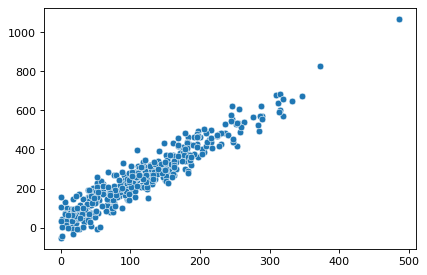

In [2]:
#0 Simulate phone dataset. 
#0a)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

data_x = np.abs(np.random.normal(loc=100, scale=100, size = 400))
data_error = np.random.normal(loc=0, scale=50, size=400)
data_y = 2*data_x + 25 + data_error

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = data_x, y = data_y)
plt.show()




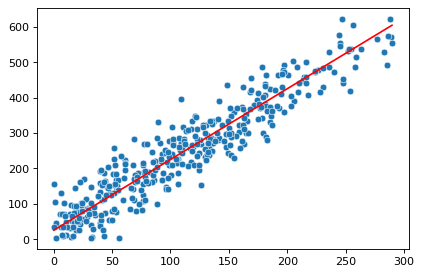

In [3]:
#0b)
cleaner = (0 < data_y) & (data_x < 300)
clean_x = data_x[cleaner]
clean_y = data_y[cleaner]
ground_truth = 2*clean_x + 25

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = clean_x, y = clean_y)
sns.lineplot(x = clean_x, y = ground_truth, color = 'red')

plt.show()

In [4]:
#0c)

import pandas as pd

new_x =pd.DataFrame(clean_x)
new_y = pd.DataFrame(clean_y)

In [5]:
#1a)

def train_test_split(x, y, train_fraction =.7, random_state=42, replace=False):
    return (x.sample(int(len(x)*train_fraction), random_state = random_state, replace=replace), y.sample(int(len(y)*train_fraction), random_state = random_state, replace=replace))

x_train,y_train = train_test_split(new_x,new_y)

x_test = new_x.drop(x_train.index)
y_test = new_y.drop(y_train.index)
#1b)
#print(f"{len(y_test),len(y_train)}")
#print(f"{len(x_test),len(x_train)}")


x_train.insert(0, "Intercept", 1)
x_test.insert(0, "Intercept", 1)


x_test[0]

1       86.173570
4       76.584663
8       53.052561
13      91.328024
14      72.491783
          ...    
371     10.158533
374    283.145877
378    235.387237
379     88.546015
380    223.781631
Name: 0, Length: 115, dtype: float64

           0
0  32.221477
1   1.910506


C:\Users\fredr\.virtualenvs\Maskininl-rning-Fredrik-Hegardt-mmrJtyaC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


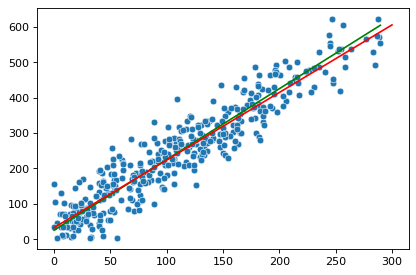

In [8]:
#2)



# this uses OLS normal equation
regression_fit = lambda X,y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(x_train, y_train)
predict = lambda X, weights: X @ weights
y_hat = predict(x_test.to_numpy(), beta_hat.to_numpy())
y_hat[:5,], y_test[:5]
x = np.linspace(0,300)

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = clean_x, y = clean_y)
sns.lineplot(x = clean_x, y = ground_truth, color = 'green')
sns.lineplot(x,beta_hat.iloc[0][0]+beta_hat.iloc[1][0] * x, color = 'red')

print(beta_hat)

plt.show()

(40.12002651149212, 86123.43250507589, 293.467941187919)


C:\Users\fredr\.virtualenvs\Maskininl-rning-Fredrik-Hegardt-mmrJtyaC\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


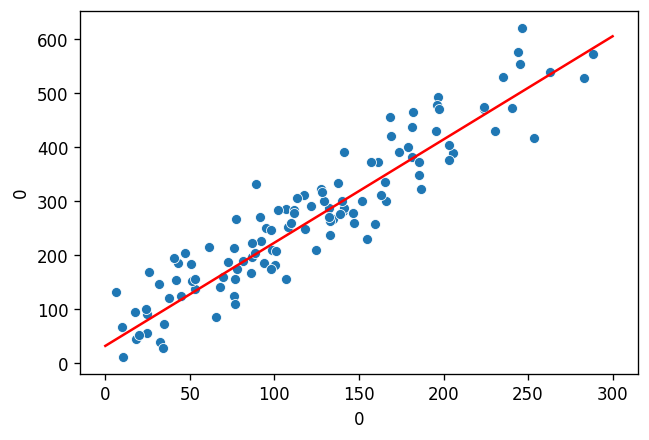

In [78]:
fig, ax = plt.subplots(dpi=120)
sns.scatterplot(x = x_test[0], y = y_test[0])
sns.lineplot(x,beta_hat.iloc[0][0]+beta_hat.iloc[1][0] * x, color = 'red')

#print(y_test[0].iloc[:5])
#print(beta_hat.iloc[0][0]+beta_hat.iloc[1][0]*x_test[0])

MAE = np.sum(np.abs(y_test[0]-(beta_hat.iloc[0][0]+beta_hat.iloc[1][0]*x_test[0])))/115
RMSE = np.sum(np.abs((y_test[0]-(beta_hat.iloc[0][0]+beta_hat.iloc[1][0]*x_test[0])**2)))/115
MSE = np.sqrt(RMSE)

print(f"{MAE,RMSE,MSE}")